In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [8]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [9]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [10]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [11]:
print(movies.shape)

(10329, 3)


In [12]:
print(ratings.shape)

(105339, 4)


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [15]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [16]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [17]:
movies[movies['title'].duplicated()]

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [18]:
movies.drop(movies.loc[movies['movieId']==26982].index,inplace= True)

In [19]:
movies.drop(movies.loc[movies['movieId']==64997].index,inplace= True)

In [20]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [21]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [22]:
!pip install wordcloud 
from wordcloud import WordCloud

In [23]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 

In [24]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

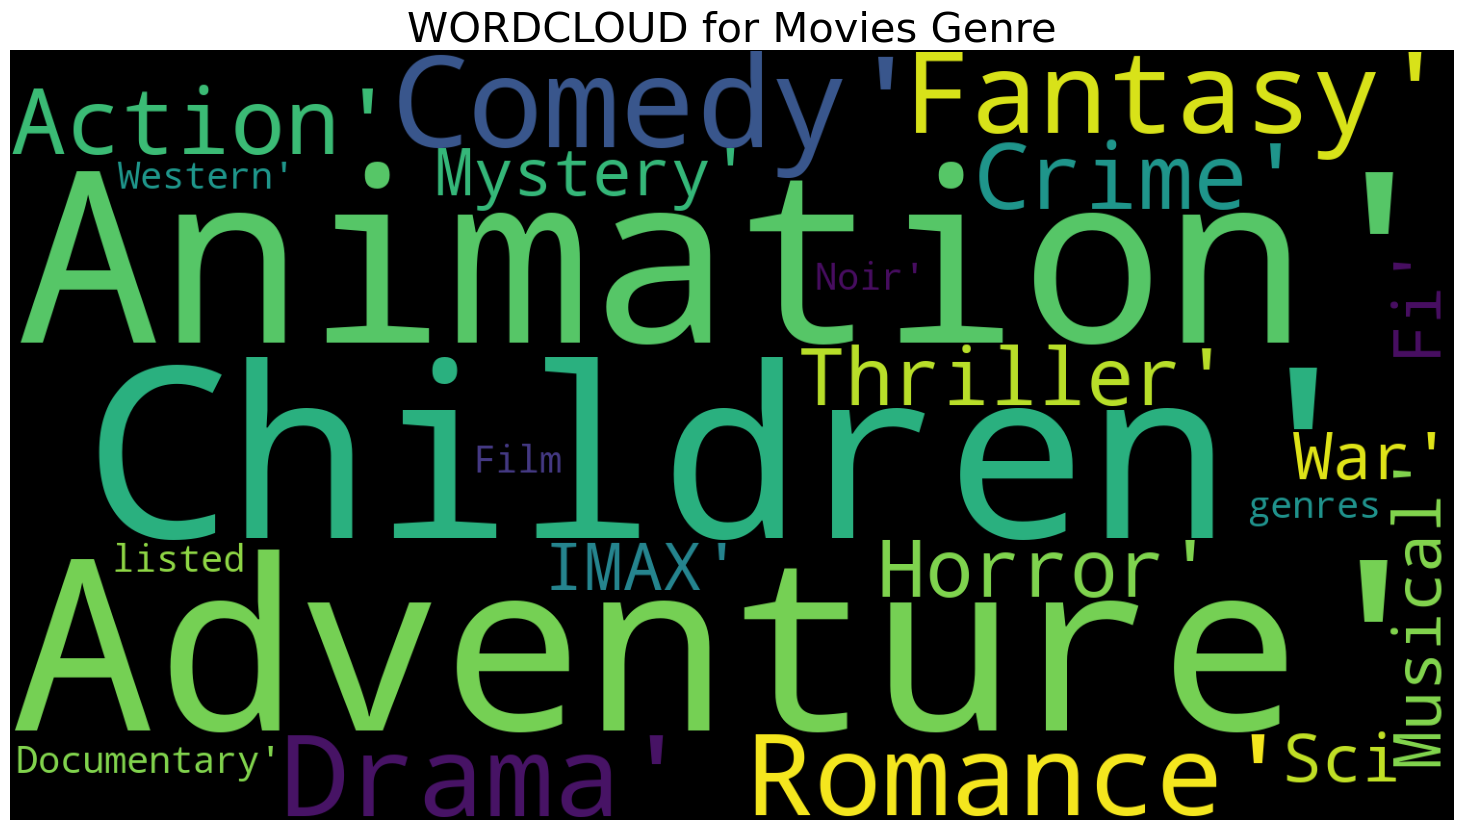

In [25]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

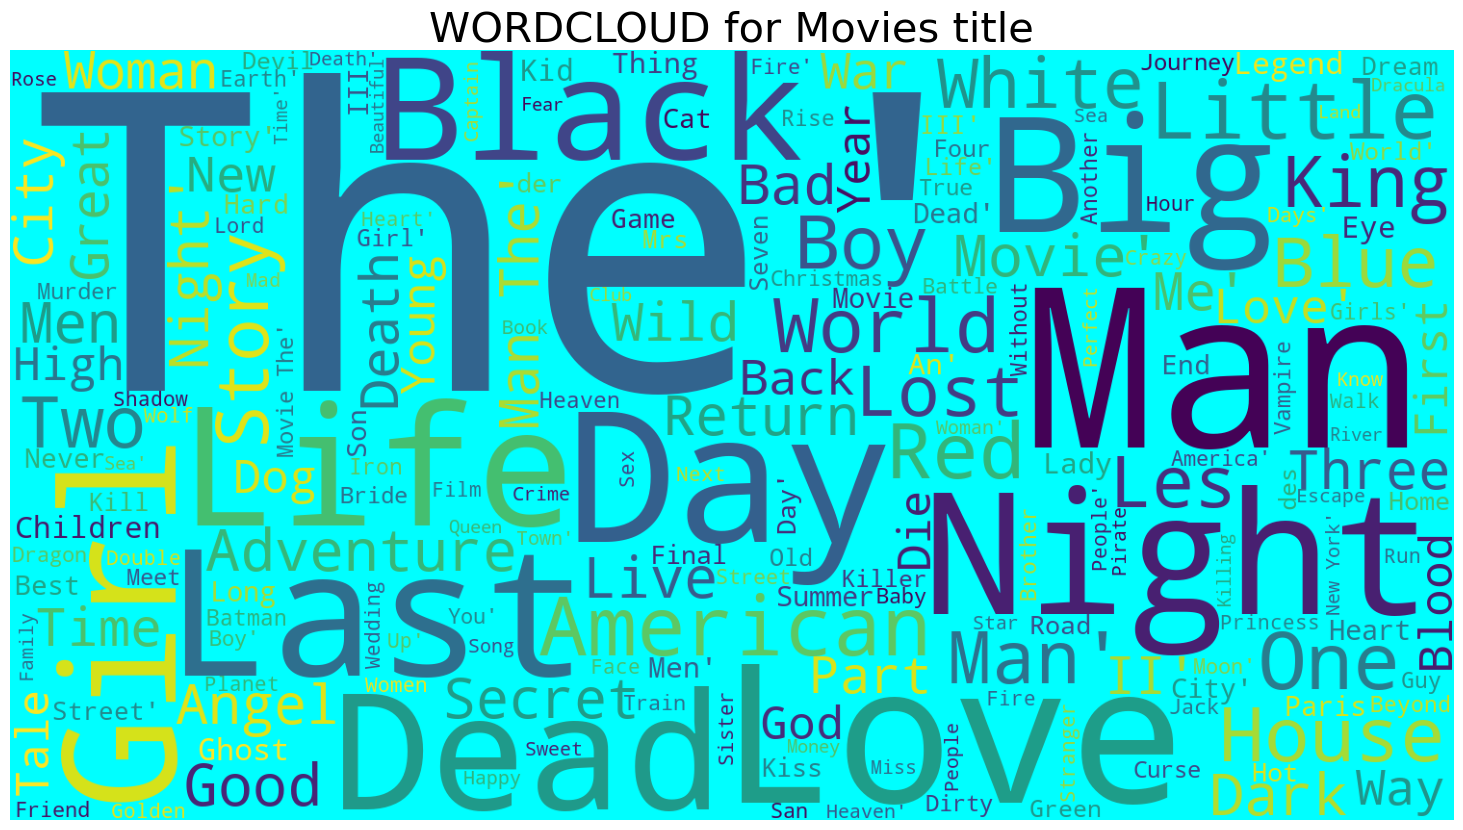

In [26]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [27]:
movies_ratings = pd.merge(ratings,movies,on='movieId')
movies_ratings.drop('timestamp', axis=1, inplace=True)
movies_ratings

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
105329,668,142488,4.0,Spotlight (2015),Thriller
105330,668,142507,3.5,Pawn Sacrifice (2015),Drama
105331,668,143385,4.0,Bridge of Spies (2015),Drama|Thriller
105332,668,144976,2.5,Bone Tomahawk (2015),Horror|Western


In [28]:
movies_ratings.drop_duplicates(inplace=True)

In [29]:
top_movies = movies_ratings[['title','rating']].groupby('title').sum().sort_values('rating',ascending=False).head(10)

In [30]:
top_movies

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


C:\Users\neha1\AppData\Local\Temp\ipykernel_23784\2227126585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c1 = sns.barplot(x=top_movies.index,y='rating',data=top_movies,palette =sns. color_palette() )


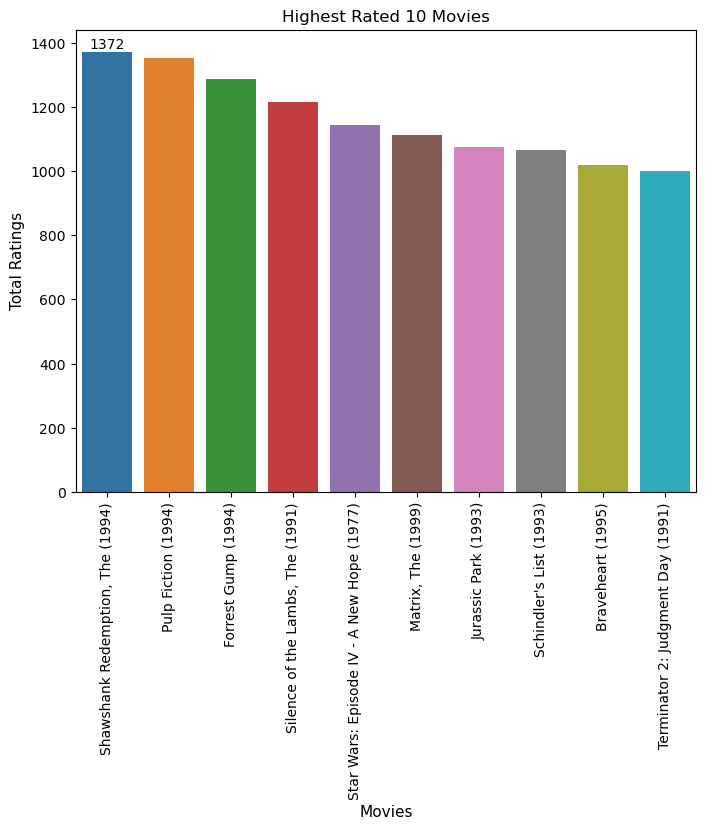

In [31]:
plt.figure(figsize=(8,6))
c1 = sns.barplot(x=top_movies.index,y='rating',data=top_movies,palette =sns. color_palette() )
c1.bar_label(c1.containers[0])
plt.xticks(rotation=90)
plt.title("Highest Rated 10 Movies")
plt.ylabel("Total Ratings", fontsize=11)
plt.xlabel("Movies", fontsize=11)
plt.show()

In [32]:
def popularity_recommender(genre, min_reviews, num_recommendations):
    genre_movies = movies_ratings[(movies_ratings['genres'] == genre) & (movies_ratings['rating'] >= min_reviews)]
    
    if genre_movies.empty:
        return "No movies found for the given genre and minimum review threshold."
    sorted_movies = genre_movies.sort_values(by='rating', ascending=False)
    top_movies = sorted_movies.head(num_recommendations)
    
    return top_movies[['title', 'rating', 'userId']]
    genre = 'Comedy'
min_reviews_threshold = 3
num_recommendations = 200

recommendations = popularity_recommender(genre, min_reviews_threshold, num_recommendations)
print(recommendations)

                                     title  rating  userId
22254          Round Trip to Heaven (1992)     4.0     164
70602  Marco Polo: One Hundred Eyes (2015)     4.0     475
70584                         Pablo (2012)     3.5     475
70597                      The Take (2009)     3.5     475


In [ ]:
#objective 2

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer



def content_based_recommender(movie_title, num_recommendations):
    # Find the row index of the input movie title
    movie_index = movies_ratings.index[movies_ratings['title'] == movies_ratings['title']].tolist()[0]
    
    # Extract genres of all movies
    genres = movies_ratings['genres']
    
    # Initialize CountVectorizer to convert text data into token counts
    count_vectorizer = CountVectorizer()
    genre_matrix = count_vectorizer.fit_transform(genres)
    
    # Calculate cosine similarity between the input movie and all other movies
    similarity_scores = cosine_similarity(genre_matrix, genre_matrix[movie_index])
    # Enumerate through similarity scores and keep track of movie indices
    movie_indices_scores = list(enumerate(similarity_scores))
    
    # Sort movie indices based on similarity scores
    sorted_movie_indices = sorted(movie_indices_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the input movie itself
    sorted_movie_indices = sorted_movie_indices[1:]
    
    # Recommend top N similar movies
    top_movie_indices = [index for index, _ in sorted_movie_indices[:num_recommendations]]
    recommended_movies = movies_ratings.iloc[top_movie_indices]
    
    return recommended_movies[['title', 'genres']]

# Example input
movie_title = 'Toy Story'
num_recommendations = 100

# Get recommendations
recommendations = content_based_recommender(movie_title, num_recommendations)
print(recommendations)

                                  title       genres
16     Shawshank Redemption, The (1994)  Crime|Drama
35                Godfather, The (1972)  Crime|Drama
44                    Goodfellas (1990)  Crime|Drama
46       Godfather: Part II, The (1974)  Crime|Drama
120             Dead Man Walking (1995)  Crime|Drama
...                                 ...          ...
4246   Shawshank Redemption, The (1994)  Crime|Drama
4255              Godfather, The (1972)  Crime|Drama
4262     Godfather: Part II, The (1974)  Crime|Drama
4300                      Capote (2005)  Crime|Drama
4302  Good Night, and Good Luck. (2005)  Crime|Drama

[100 rows x 2 columns]


In [ ]:
#objective 3

In [34]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies_ratings[movies_ratings['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = df_movies[df_movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':df_movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df['Title']
    else:
        return "No movies found. Please check your input"

In [35]:
get_movie_recommendation('Toy Story (1995)')


C:\Users\neha1\AppData\Local\Temp\ipykernel_23784\3487254910.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie_list = movies_ratings[movies_ratings['title'].str.contains(movie_name)]


'No movies found. Please check your input'

In [36]:
import random
movie=random.choice(movies_ratings.title.unique())
print("Recommendation for movie :  {}\n".format(movie))
get_movie_recommendation(movie)

Recommendation for movie :  Shaft (1971)



C:\Users\neha1\AppData\Local\Temp\ipykernel_23784\3487254910.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie_list = movies_ratings[movies_ratings['title'].str.contains(movie_name)]


'No movies found. Please check your input'